# Week Six - Assignment Data Sets

*Instructions*

*Here is a dataset that shows a simple 2-node network: the attendance of 18 Southern Women at 14 social events:*

1. *[Brief Description](http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis). Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.*
2. *[Dataset](http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat).*
3. *Python code to create dataset: https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html*

*What can you infer about the relationships between (1) the women, and (2) the social events?*  

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite as bi
import math
import matplotlib.colors as mcolors

G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]

print("Biadjacency matrix")
print(bi.biadjacency_matrix(G, women, clubs))

Biadjacency matrix
<Compressed Sparse Row sparse array of dtype 'int64'
	with 89 stored elements and shape (18, 14)>
  Coords	Values
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


In [3]:
# project bipartite graph onto women nodes
W = bi.projected_graph(G, women)
print()
print("#Friends, Member")
for w in women:
    print(f"{W.degree(w)} {w}")


#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price


In [4]:
# project bipartite graph onto women nodes keeping number of co-occurrence
# the degree computed is weighted and counts the total number of shared contacts
W = bi.weighted_projected_graph(G, women)
print()
print("#Friend meetings, Member")
for w in women:
    print(f"{W.degree(w, weight='weight')} {w}")


#Friend meetings, Member
50 Evelyn Jefferson
45 Laura Mandeville
57 Theresa Anderson
46 Brenda Rogers
24 Charlotte McDowd
32 Frances Anderson
36 Eleanor Nye
31 Pearl Oglethorpe
40 Ruth DeSand
38 Verne Sanderson
33 Myra Liddel
37 Katherina Rogers
46 Sylvia Avondale
43 Nora Fayette
34 Helen Lloyd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


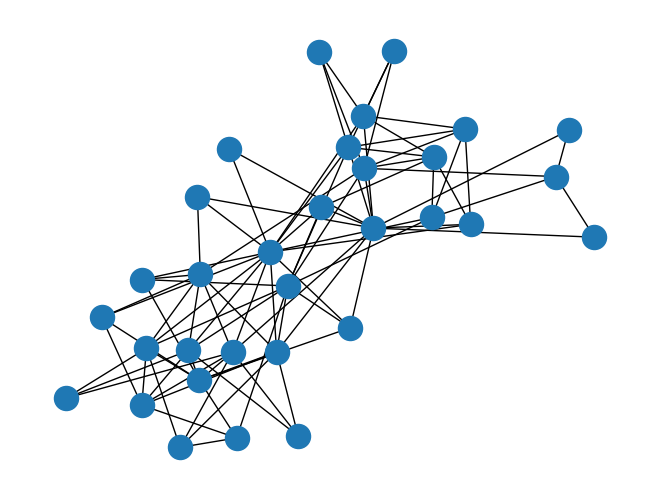

In [5]:
pos = nx.spring_layout(G, seed=648)  # Seed layout for reproducible node positions
nx.draw(G, pos)
plt.show()

## Checking the Connected Components
We'll start by looking at the Women network to get the largest connected component. We'll first find the largest connected component and save that subgraph as a graph called `wnet`. Once that's done we'll get weights by iterating through ever edge in `wnet` and calculate the log of that edge. We decided to do this to remove some of the noise from the weights in the graph.

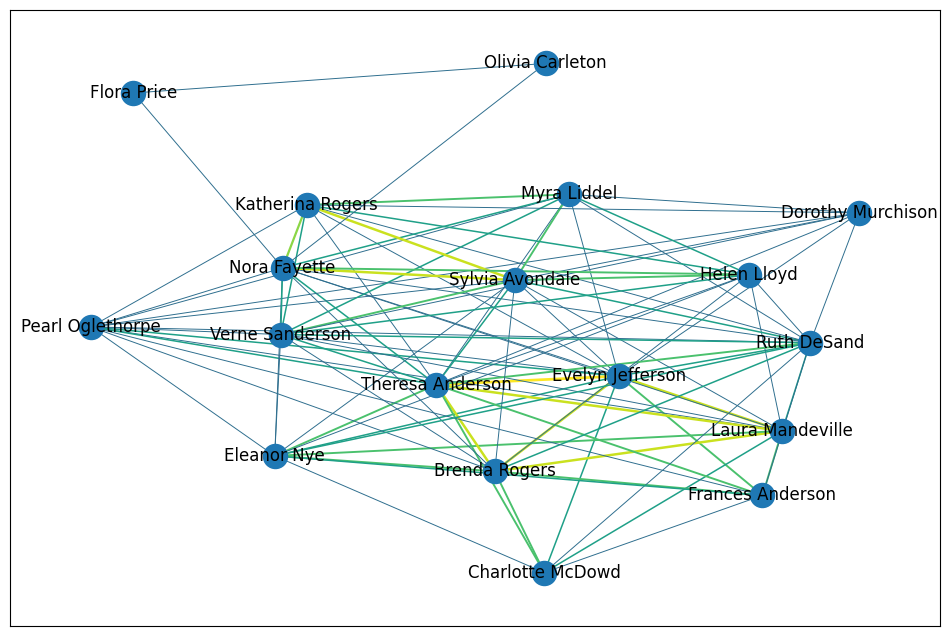

In [6]:
w_largest_component_nodes = max(nx.connected_components(W), key=len)

wnet = W.subgraph(w_largest_component_nodes).copy()

w_weights = [math.log(edata['weight']) for f,t,edata in wnet.edges(data=True)]

plt.figure(figsize=(12,8))
nx.draw_networkx(
    wnet,
    width=w_weights,
    edge_color=w_weights
)
plt.show()

Analyzing this visually, we can see that most individuals are linked together pretty loosely as it's demonstrated with a thin light blue line. Although it's pretty difficult to see who's connected to who so we'll only display the top 10 edges:

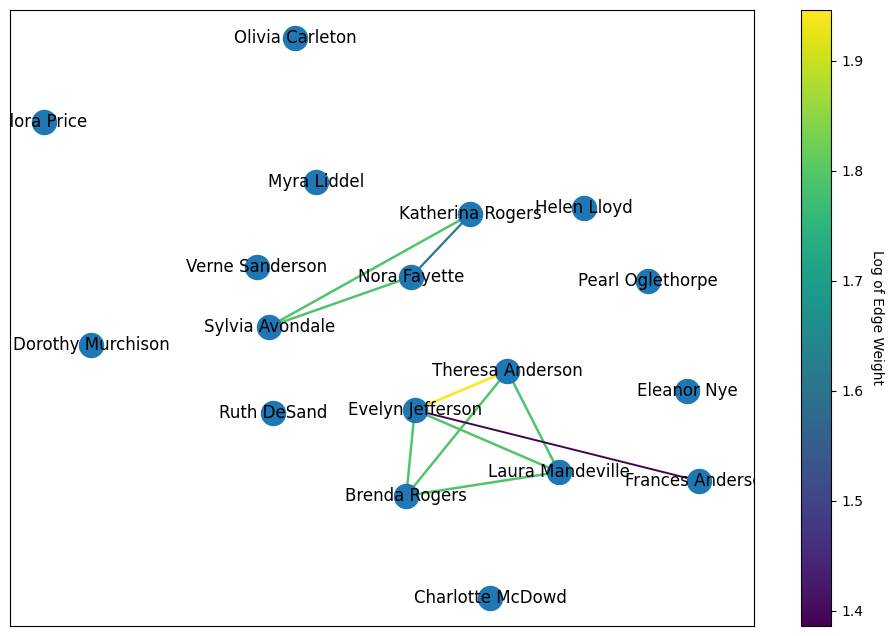

In [9]:
x = 10
w_top_x_edges = sorted(wnet.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)[:x]

w_top_x_weights = [math.log(data['weight']) for u, v, data in w_top_x_edges]

# Defining a color map
cmap = plt.cm.viridis
norm = mcolors.Normalize(vmin=min(w_top_x_weights), vmax=max(w_top_x_weights))

# Setting the color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

fig, ax = plt.subplots(figsize=(12, 8))

nx.draw_networkx(
    wnet,
    ax=ax,
    edgelist = w_top_x_edges,
    width = w_top_x_weights,
    edge_color = w_top_x_weights,
    edge_cmap = cmap
)

# Adding the colorbar
cbar = plt.colorbar(sm, ax=ax) # <-- Pass the Axes to the colorbar function
cbar.set_label('Log of Edge Weight', rotation=270, labelpad=15)

plt.show()

From the above, we can see that Evelyn Jefferson and Theresa Anderson are the most highly connected with many of the other women in the top 10 connected in a similar fashion. Evelyn and Frances Anderson are also connected but their connection is the weakest. There seems to be a clique between Sylvia, Nora, and Katherina as well.

Now doing the same with the Clubs:

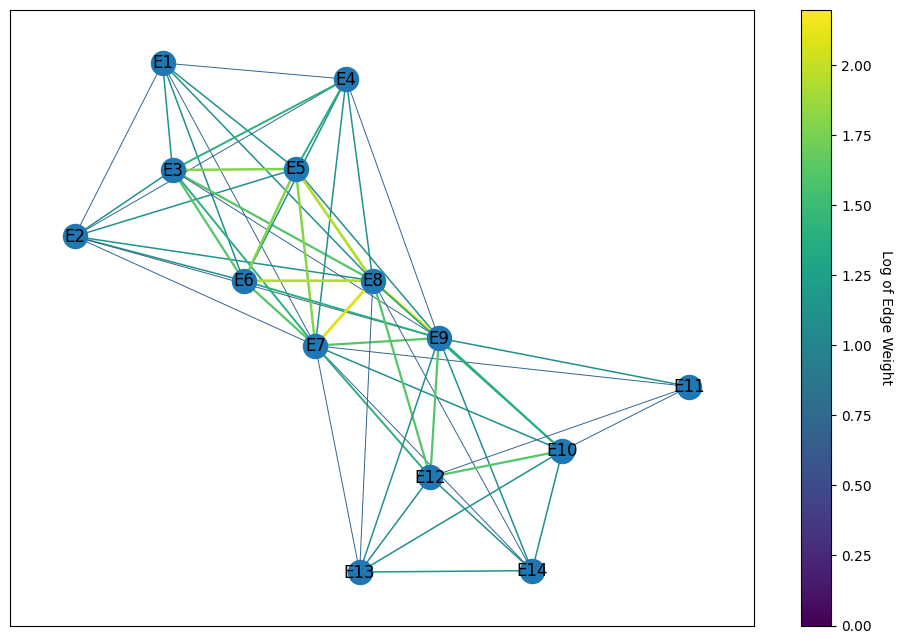

In [ ]:
C = bi.weighted_projected_graph(G, clubs)

c_largest_component_nodes = max(nx.connected_components(C), key=len)

cnet = C.subgraph(c_largest_component_nodes).copy()

c_weights = [math.log(edata['weight']) for f,t,edata in cnet.edges(data=True)]

# Defining a color map
cmap = plt.cm.viridis
norm = mcolors.Normalize(vmin=min(c_weights), vmax=max(c_weights))

# Setting the color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

fig, ax = plt.subplots(figsize=(12, 8))

nx.draw_networkx(
    cnet,
    ax=ax,
    width = c_weights,
    edge_color = c_weights,
    edge_cmap = cmap
)

# Adding the colorbar
cbar = plt.colorbar(sm, ax=ax) # <-- Pass the Axes to the colorbar function
cbar.set_label('Log of Edge Weight', rotation=270, labelpad=15)

plt.show()

Repeating the analysis with the events, we can see that `E7` and `E8` are the strongest events indicating that they're the most important in the network. It also seemss that `E8` is the most important as the strength of connections to other events seems to radiate outwards from `E8`.

If I were a Machiavellianistic woman, I'd like to know:
1. What events would I have the best opportunity to meet and form a bond with Evelyn and her clique?
2. Who would be the most productive person to speak at in each event?

To answer the first question, we'd like to know all the events Evelyn attended where she had the least of her close clique in:

In [39]:
evelyn = 'Evelyn Jefferson'

# Find Evelyn's connections and sort them by weight (strongest first)
evelyn_connections = []
for neighbor in W.neighbors(evelyn):
    weight = W.edges[evelyn, neighbor]['weight']
    evelyn_connections.append((neighbor, weight))

evelyn_connections.sort(key=lambda x: x[1], reverse=True)

# get her top 3 connections
top_connections = [person for person, weight in evelyn_connections[:3]]
print(f"Evelyn's top connections: {top_connections}")

evelyn_events = set(G.neighbors(evelyn))
print(f"Events Evelyn went to: {sorted(list(evelyn_events))}")

for top_connection in top_connections:
    connections_events = set()
    connections_events = set(G.neighbors(top_connection))
    exclusive_events = evelyn_events.difference(connections_events)
    print(f"\tEvents Evelyn went to that {top_connection} did not: {list(exclusive_events)}")

Evelyn's top connections: ['Theresa Anderson', 'Brenda Rogers', 'Laura Mandeville']
Events Evelyn went to: ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E8', 'E9']
	Events Evelyn went to that Theresa Anderson did not: ['E1']
	Events Evelyn went to that Brenda Rogers did not: ['E2', 'E9']
	Events Evelyn went to that Laura Mandeville did not: ['E9', 'E4']


Both Brenda and Laura didn't go to `E9`, which would have been a good time to get Evelyn one on one.

We can infer that...
> NOTE: we need to do a projection